In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Define constants
W = 0.2108
M0 = 0.87539
arm = M0/W
L = 14/9
LT = 4.25 # wing to hstab length (quarter chord to quarted chord) (approx vstab too hence LT for entire tail)
Sh = 3
AR = 5
b = 7.5
S = b**2/AR
Vh = Sh*LT/S/L

In [67]:
def load_data(filename, stall, nrows=None):
    if nrows is None:
        data = pd.read_csv(filename, sep=',', header=None, skiprows=6, usecols=[7,8,9,10,11,12,13,14])
    else:
        data = pd.read_csv(filename, sep=',', header=None, skiprows=6, nrows=nrows, usecols=[7,8,9,10,11,12,13,14])
    data.columns = ['rpm', 'alpha', 'q', 'u', 'Re', 'A', 'N', 'M']
    data['alpha'] *= np.pi/180
    data['A'] -= W*np.sin(data['alpha'])
    data['N'] += W*np.cos(data['alpha'])
    data['M'] += M0*np.cos(data['alpha'])
    data['L'] = data['N']*np.cos(data['alpha']) - data['A']*np.sin(data['alpha'])
    data['D'] = data['N']*np.sin(data['alpha']) + data['A']*np.cos(data['alpha'])
    idx = data['alpha'] < np.radians(stall)
    NP = guessNP(data['alpha'][idx], data['N'][idx], data['M'][idx])
    print('NP:', NP)
    data['MNP'] = data['M']*(1-NP) - (data['N'] - data['M'])*NP
    return data

def guessNP(alpha, N, M):
    A = np.array([alpha, np.ones(len(alpha))]).T
    init = True
    for x in np.linspace(-8, 8, 801):
        y = M*(1-x) - (N-M)*x
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        if init:
            delta = x
            slope = abs(m)
            init = False
        else:
            if abs(m) < slope:
                delta = x
                slope = abs(m)
    return delta

In [68]:
def load_data2(filename, nrows=None):
    if nrows is None:
        data = pd.read_csv(filename, sep=',', header=None, skiprows=4, usecols=[0,5])
    else:
        data = pd.read_csv(filename, sep=',', header=None, skiprows=4, nrows=nrows, usecols=[1,5])
    return data

In [72]:
df10k = load_data2('10k_data.csv')
df50k = load_data2('50k_data_fixCG.csv')
df90k = load_data2('90k_data.csv')

In [73]:
#10k data
vspData10k = pd.DataFrame(data=None, columns = [])
vspData10k.name = '10k'
lenAlpha = len(df10k.loc[df10k[0] == 'Alpha'][5].values[:].tolist())
vspData10k['Alpha'] = df10k.loc[df10k[0] == 'Alpha'][5].values[:].tolist()
vspData10k['CL'] = df10k.loc[df10k[0] == 'CL'][5].values[:].tolist()[0:lenAlpha]
vspData10k['CDtot'] = df10k.loc[df10k[0] == 'CDtot'][5].values[:].tolist()[0:lenAlpha]
vspData10k['CMy'] = df10k.loc[df10k[0] == 'CMy'][5].values[:].tolist()[0:lenAlpha]
vspData10k['L/D'] = df10k.loc[df10k[0] == 'L/D'][5].values[:].tolist()[0:lenAlpha]

#50k data
vspData50k = pd.DataFrame(data=None, columns = [])
vspData50k.name = '50k'
lenAlpha = len(df50k.loc[df50k[0] == 'Alpha'][5].values[:].tolist())
vspData50k['Alpha'] = df50k.loc[df50k[0] == 'Alpha'][5].values[:].tolist()
vspData50k['CL'] = df50k.loc[df50k[0] == 'CL'][5].values[:].tolist()[0:lenAlpha]
vspData50k['CDtot'] = df50k.loc[df50k[0] == 'CDtot'][5].values[:].tolist()[0:lenAlpha]
vspData50k['CMy'] = df50k.loc[df50k[0] == 'CMy'][5].values[:].tolist()[0:lenAlpha]
vspData50k['L/D'] = df50k.loc[df50k[0] == 'L/D'][5].values[:].tolist()[0:lenAlpha]

#90k data
vspData90k = pd.DataFrame(data=None, columns = [])
vspData90k.name = '90k' 
lenAlpha = len(df90k.loc[df90k[0] == 'Alpha'][5].values[:].tolist())
vspData90k['Alpha'] = df90k.loc[df90k[0] == 'Alpha'][5].values[:].tolist()
vspData90k['CL'] = df90k.loc[df90k[0] == 'CL'][5].values[:].tolist()[0:lenAlpha]
vspData90k['CDtot'] = df90k.loc[df90k[0] == 'CDtot'][5].values[:].tolist()[0:lenAlpha]
vspData90k['CMy'] = df90k.loc[df90k[0] == 'CMy'][5].values[:].tolist()[0:lenAlpha]
vspData90k['L/D'] = df90k.loc[df90k[0] == 'L/D'][5].values[:].tolist()[0:lenAlpha]

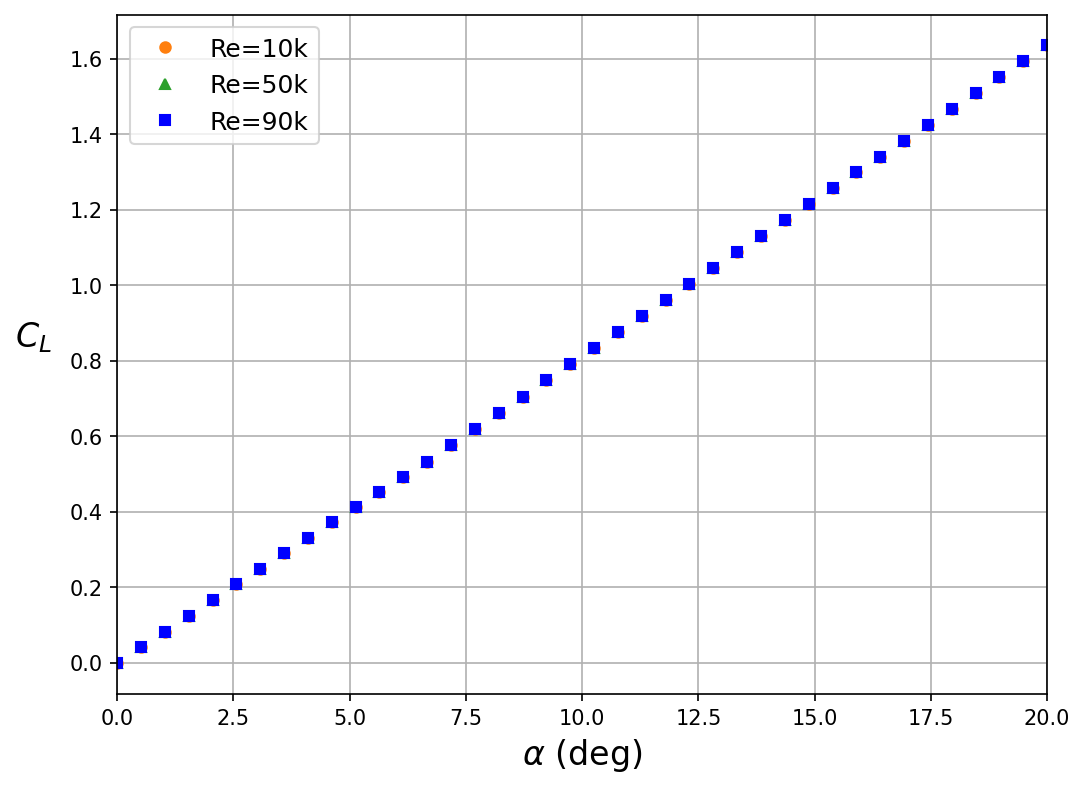

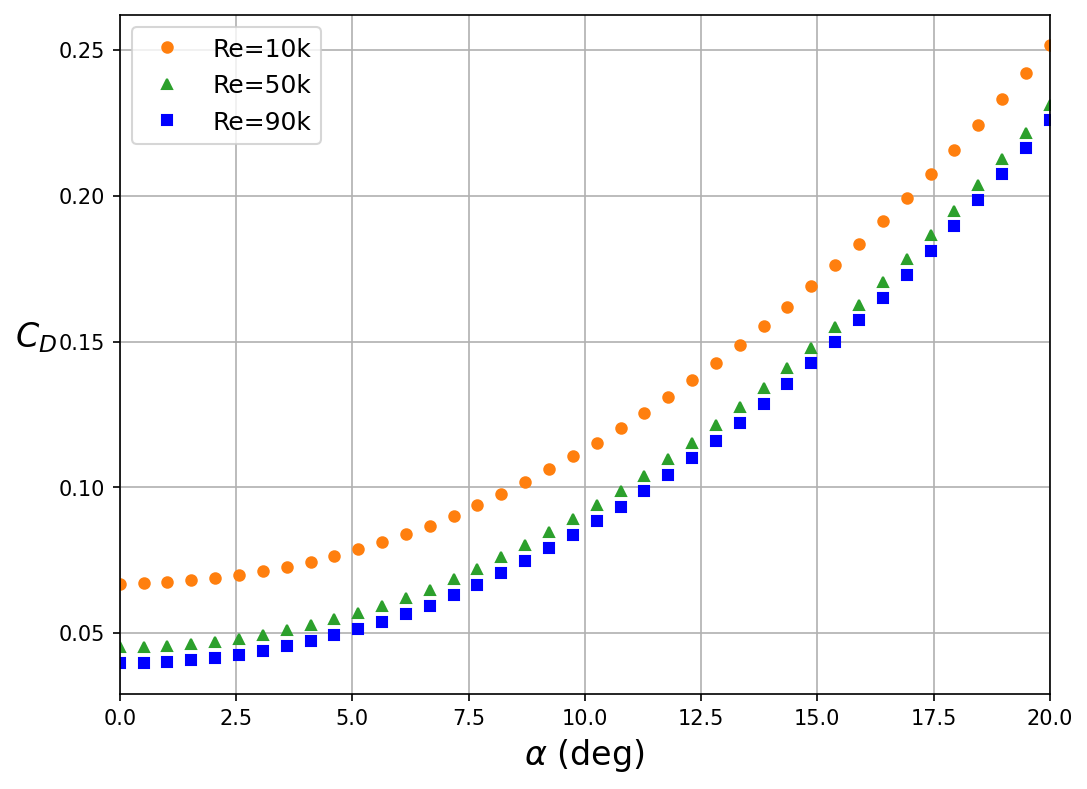

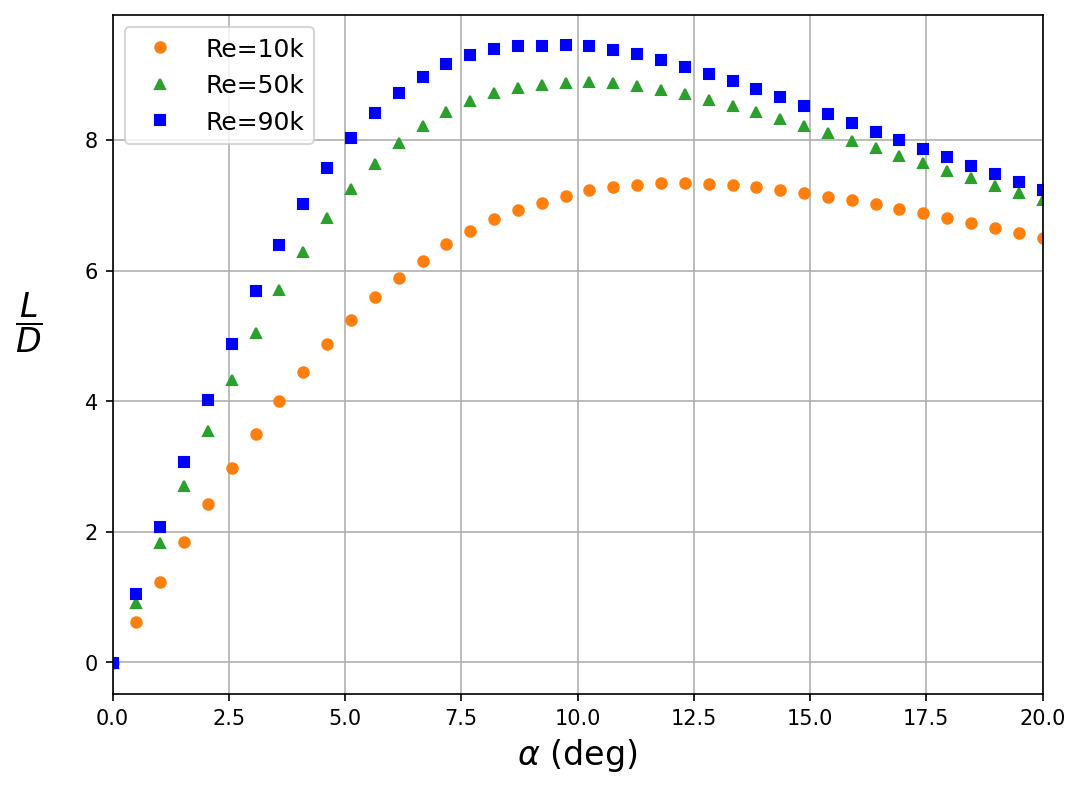

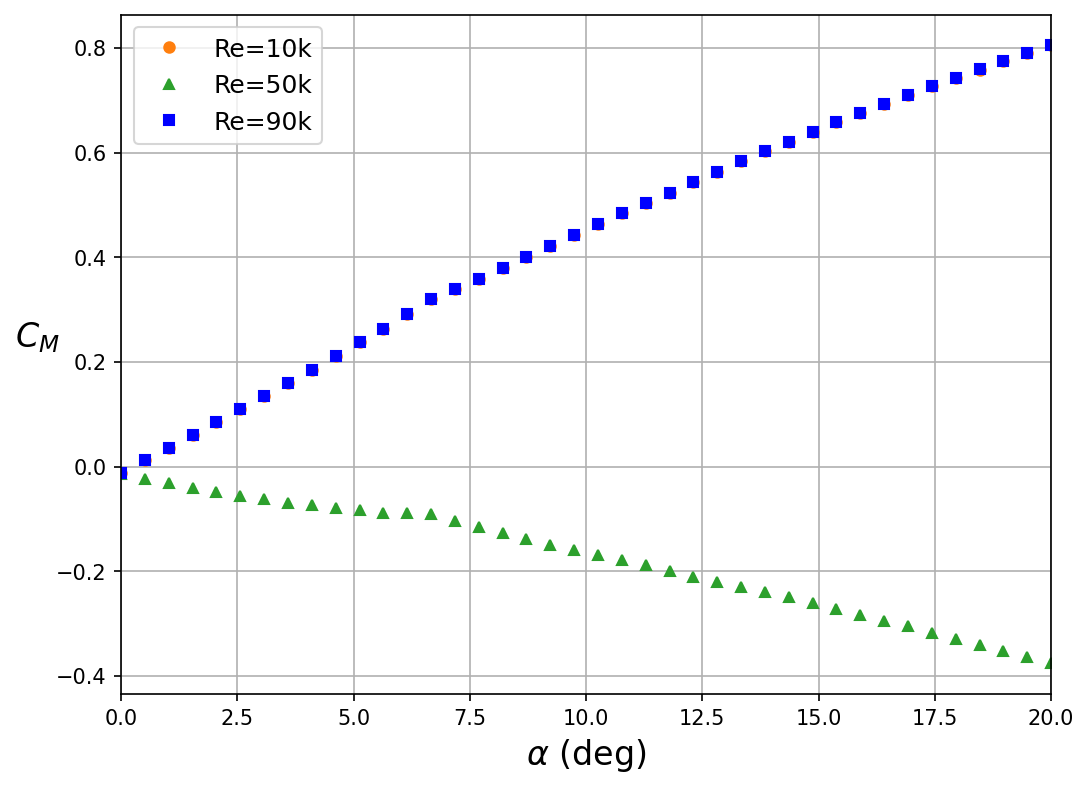

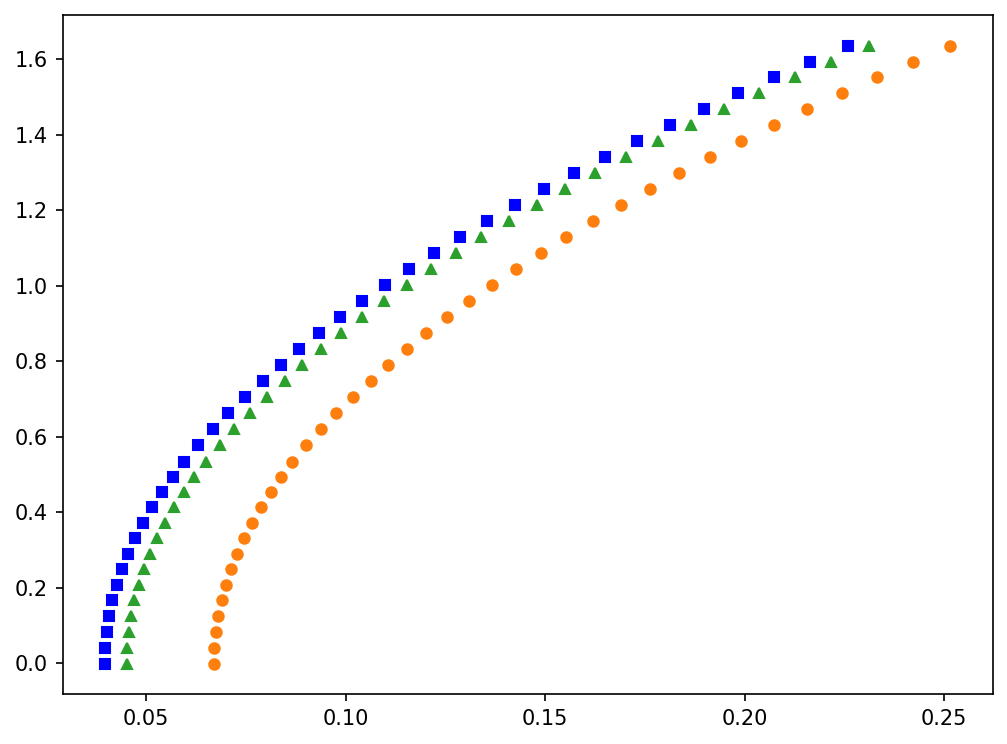

In [74]:
config = [['10k', 7, None], ['50k', 7, 13], ['90k', 9, None]]
marker = ['o', '^', 's']
color = ['tab:orange', 'tab:green', 'b']
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=150)
fig2, ax2 = plt.subplots(figsize=(8,6), dpi=150)
fig3, ax3 = plt.subplots(figsize=(8,6), dpi=150)
fig4, ax4 = plt.subplots(figsize=(8,6), dpi=150)
fig5, ax5 = plt.subplots(figsize=(8,6), dpi=150)
for df in (vspData10k,vspData50k,vspData90k):
    if(df.name == '10k'):
        i = 0
    if(df.name == '50k'):
        i = 1
    if(df.name == '90k'):
        i = 2
    ax1.plot(df['Alpha'], df['CL'], marker[i], markersize=5, color=color[i], label='Re='+df.name)
    ax2.plot(df['Alpha'], df['CDtot'], marker[i], markersize=5, color=color[i], label='Re='+df.name)
    ax3.plot(df['Alpha'], df['L/D'], marker[i], markersize=5, color=color[i], label='Re='+df.name)
    ax4.plot(df['Alpha'], df['CMy'], marker[i], markersize=5, color=color[i], label='Re='+df.name)
    ax5.plot(df['CDtot'], df['CL'], marker[i], markersize=5, color=color[i], label='Re='+df.name) 
ax1.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax2.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax3.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax4.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax1.set_ylabel(r'$C_L$', rotation=0, fontsize=16)
ax2.set_ylabel(r'$C_D$', rotation=0, fontsize=16)
ax3.set_ylabel(r'$\dfrac{L}{D}$', rotation=0, fontsize=16)
ax4.set_ylabel(r'$C_M$', rotation=0, fontsize=16)
ax1.yaxis.set_label_coords(-0.09, 0.5)
ax2.yaxis.set_label_coords(-0.09, 0.5)
ax3.yaxis.set_label_coords(-0.09, 0.5)
ax4.yaxis.set_label_coords(-0.09, 0.5)
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.set_xlim(0, 20)
ax2.set_xlim(0, 20)
ax3.set_xlim(0, 20)
ax4.set_xlim(0, 20)
fig1.savefig('CL.png')
fig2.savefig('CD.png')
fig3.savefig('LD.png')
fig4.savefig('CM.png')

NP: 1.3200000000000003
NP: 5.380000000000001
NP: 5.26


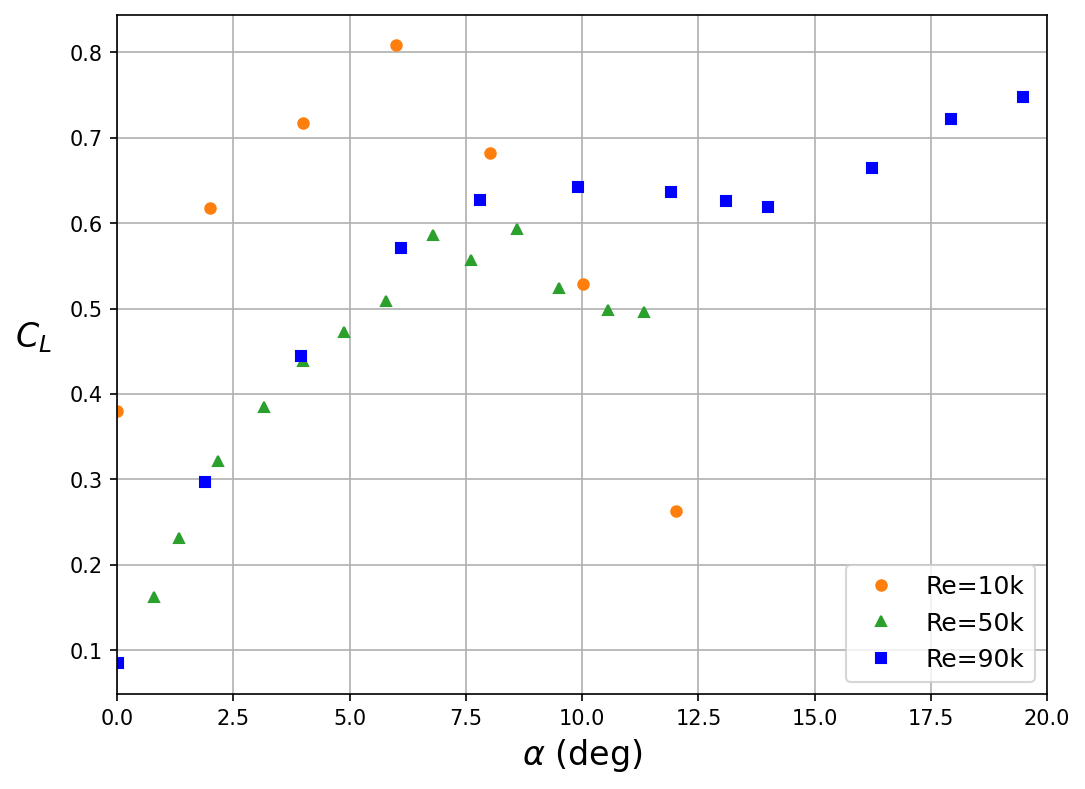

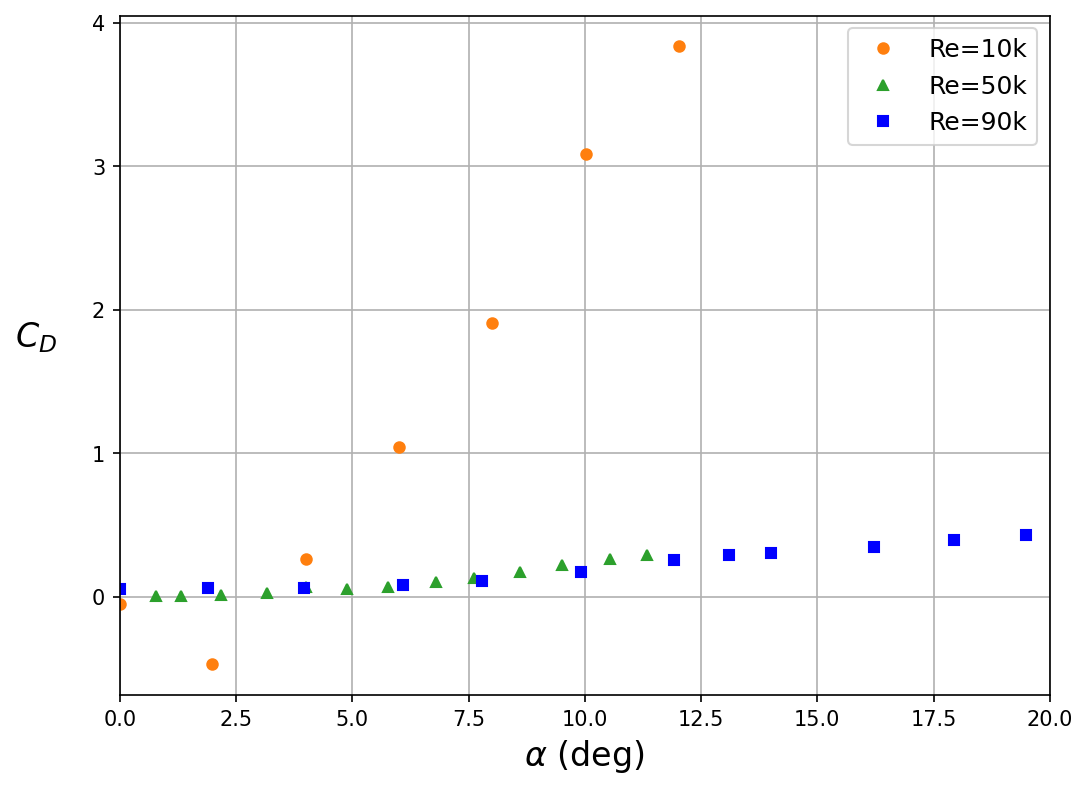

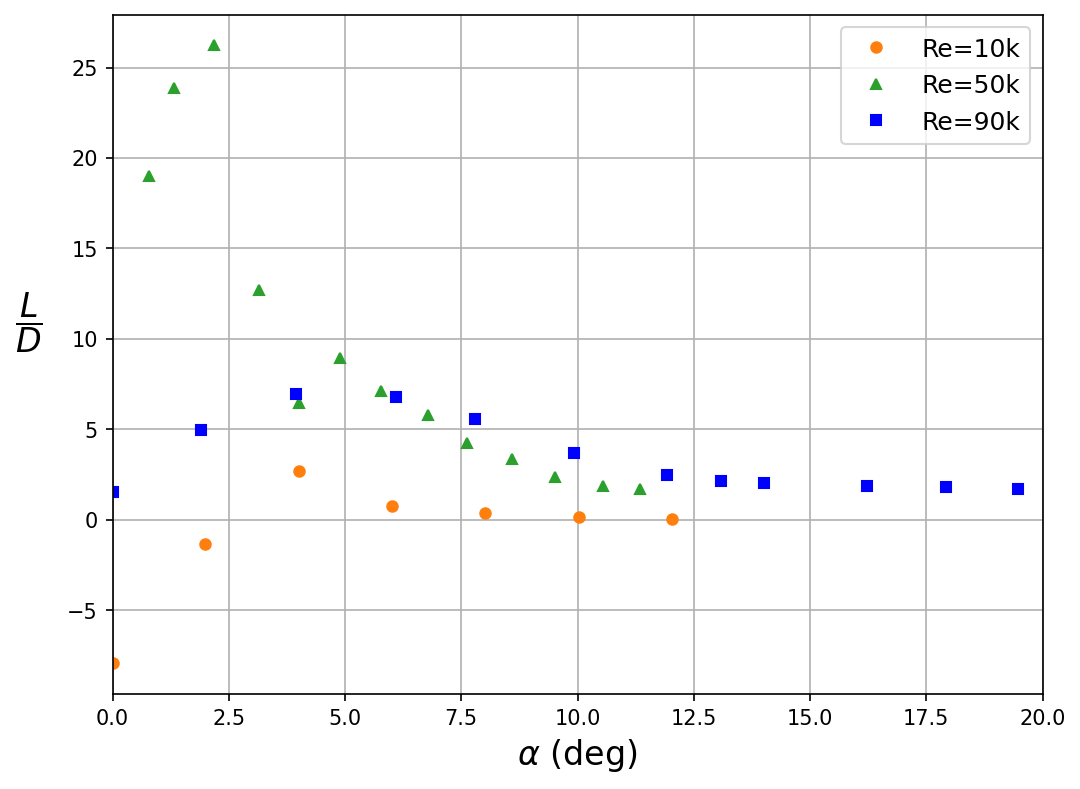

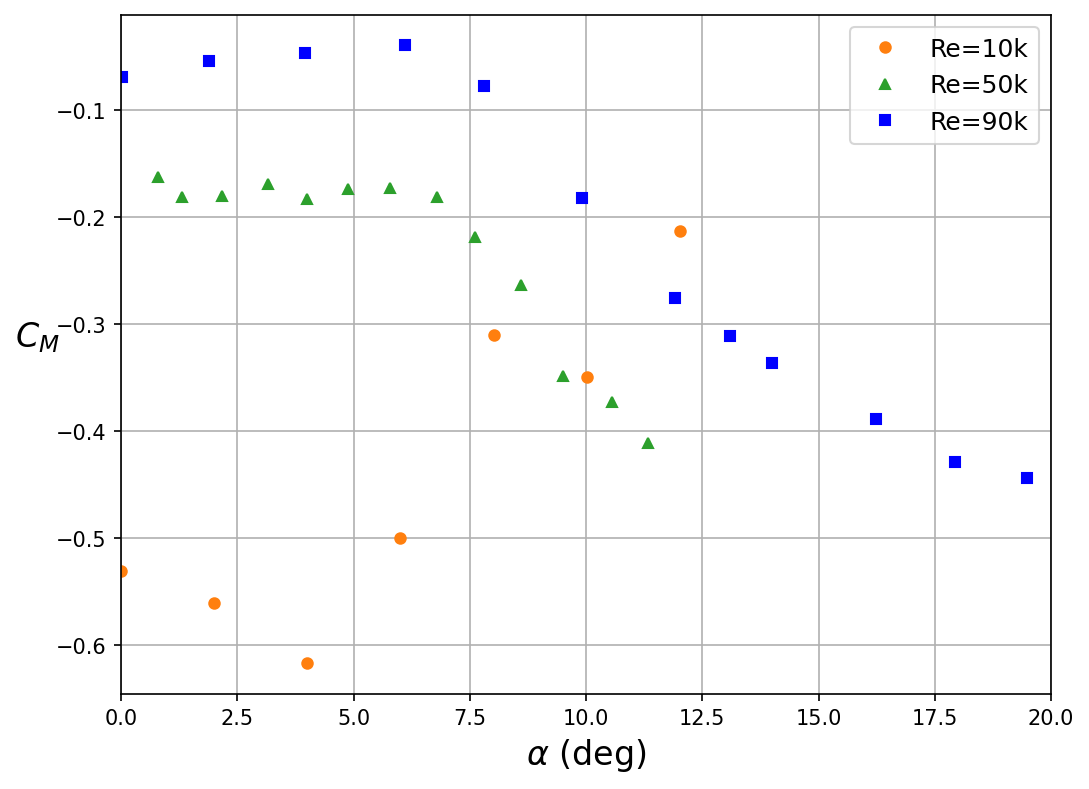

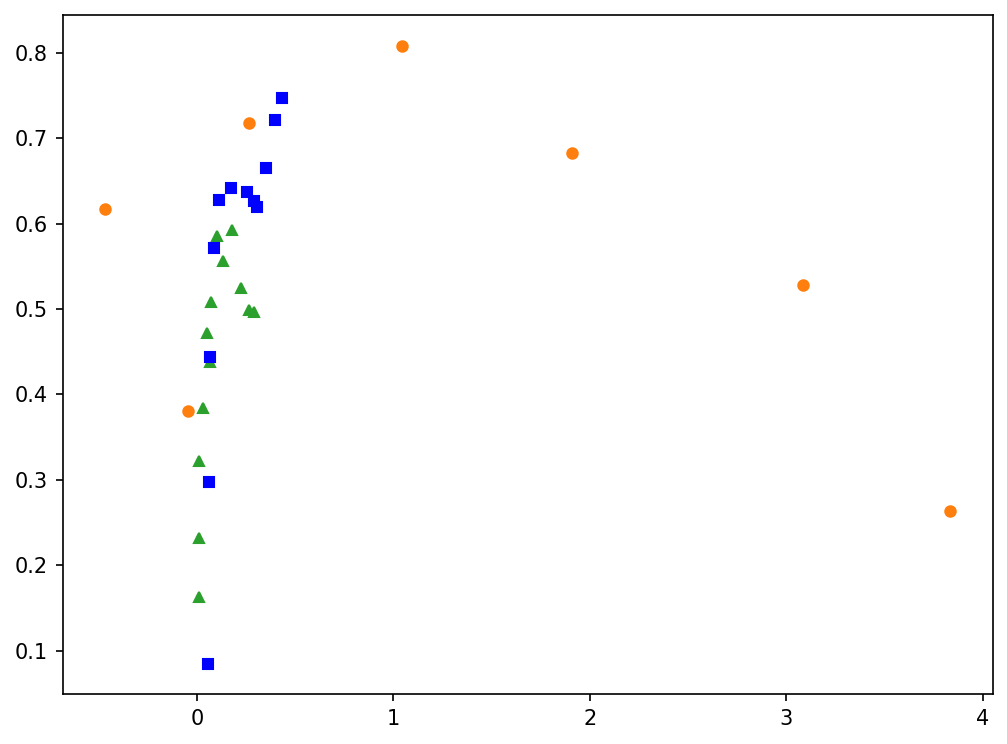

In [59]:
config = [['10k', 7, None], ['50k', 7, 13], ['90k', 9, None]]
marker = ['o', '^', 's']
color = ['tab:orange', 'tab:green', 'b']
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=150)
fig2, ax2 = plt.subplots(figsize=(8,6), dpi=150)
fig3, ax3 = plt.subplots(figsize=(8,6), dpi=150)
fig4, ax4 = plt.subplots(figsize=(8,6), dpi=150)
fig5, ax5 = plt.subplots(figsize=(8,6), dpi=150)
for i in range(len(config)):
    df = load_data('Re_'+config[i][0], config[i][1], nrows=config[i][2])
    C_L = df['L']/df['q']/S
    C_D = df['D']/df['q']/S
    C_M = df['MNP']/df['q']/S/L
    ax1.plot(np.degrees(df['alpha']), C_L, marker[i], markersize=5, color=color[i], label='Re='+config[i][0])
    ax2.plot(np.degrees(df['alpha']), C_D, marker[i], markersize=5, color=color[i], label='Re='+config[i][0])
    ax3.plot(np.degrees(df['alpha']), C_L/C_D, marker[i], markersize=5, color=color[i], label='Re='+config[i][0])
    ax4.plot(np.degrees(df['alpha']), C_M, marker[i], markersize=5, color=color[i], label='Re='+config[i][0])
    ax5.plot(C_D, C_L, marker[i], markersize=5, color=color[i], label='Re='+config[i][0])
ax1.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax2.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax3.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax4.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax1.set_ylabel(r'$C_L$', rotation=0, fontsize=16)
ax2.set_ylabel(r'$C_D$', rotation=0, fontsize=16)
ax3.set_ylabel(r'$\dfrac{L}{D}$', rotation=0, fontsize=16)
ax4.set_ylabel(r'$C_M$', rotation=0, fontsize=16)
ax1.yaxis.set_label_coords(-0.09, 0.5)
ax2.yaxis.set_label_coords(-0.09, 0.5)
ax3.yaxis.set_label_coords(-0.09, 0.5)
ax4.yaxis.set_label_coords(-0.09, 0.5)
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.set_xlim(0, 20)
ax2.set_xlim(0, 20)
ax3.set_xlim(0, 20)
ax4.set_xlim(0, 20)
fig1.savefig('CL_exp.png')
fig2.savefig('CD_exp.png')
fig3.savefig('LD_exp.png')
fig4.savefig('CM_exp.png')

NP: 1.3200000000000003
NP: 5.380000000000001
NP: 5.26


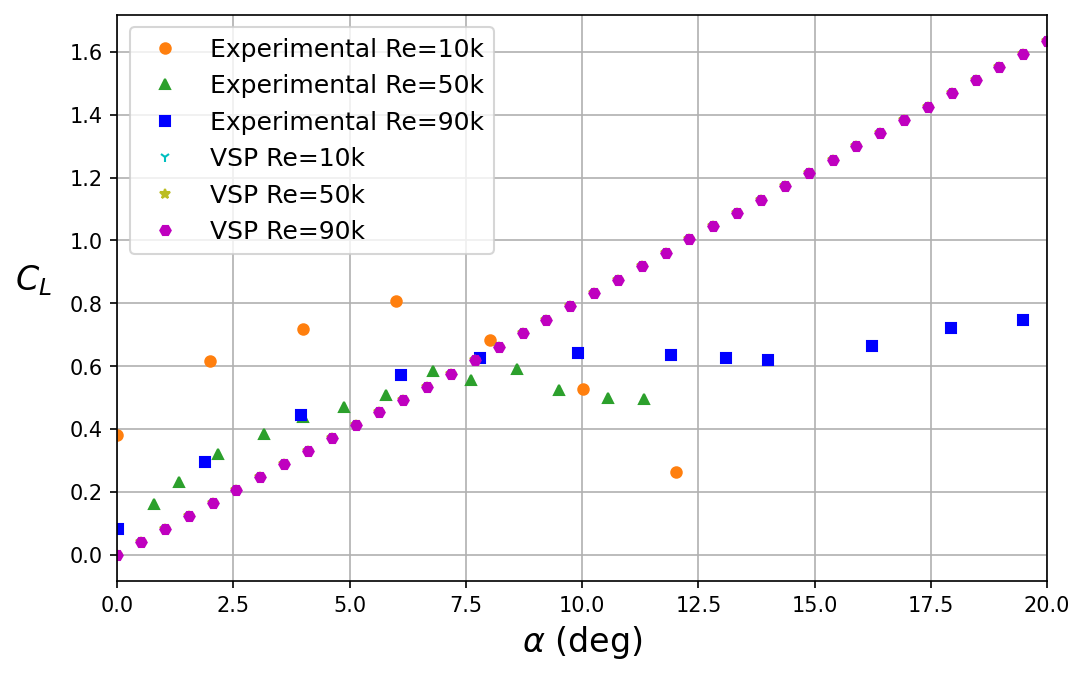

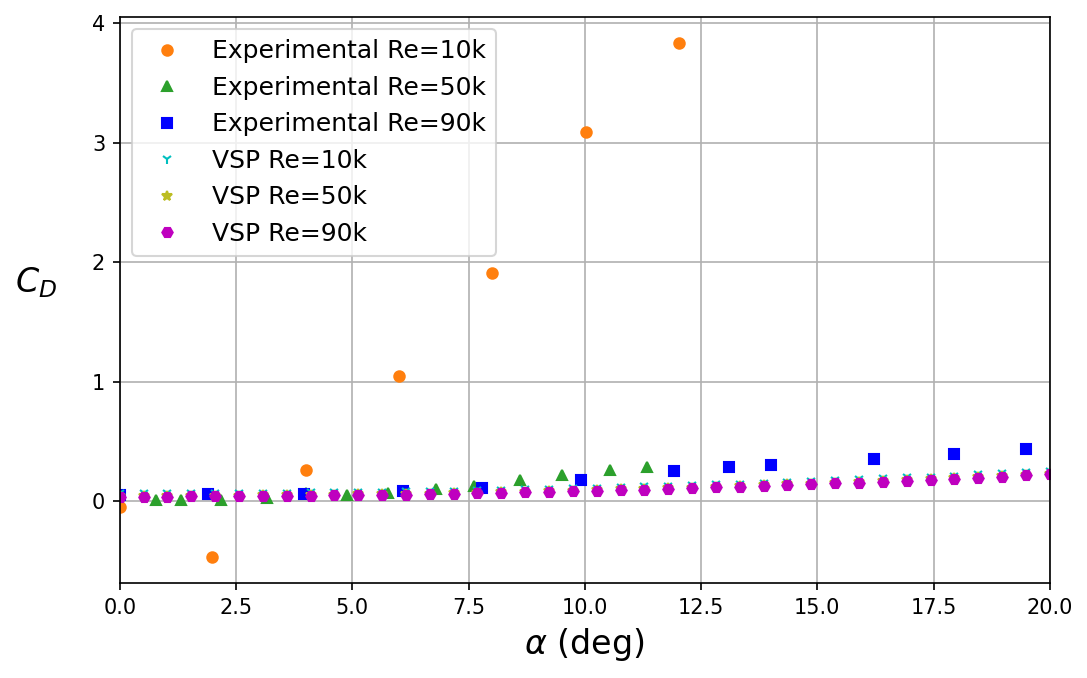

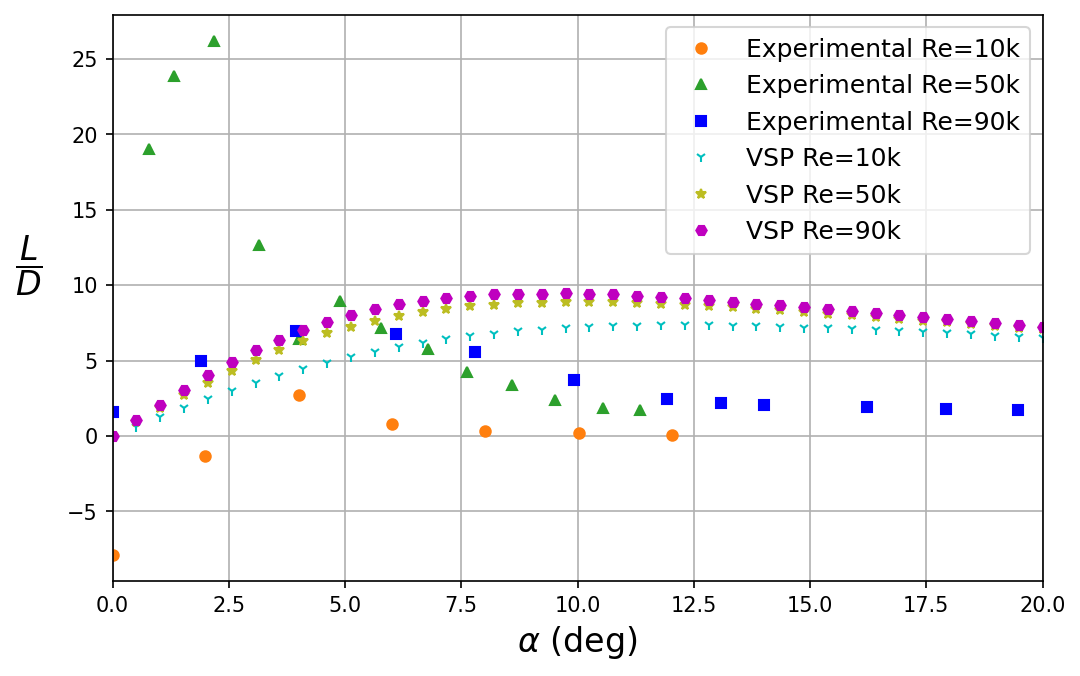

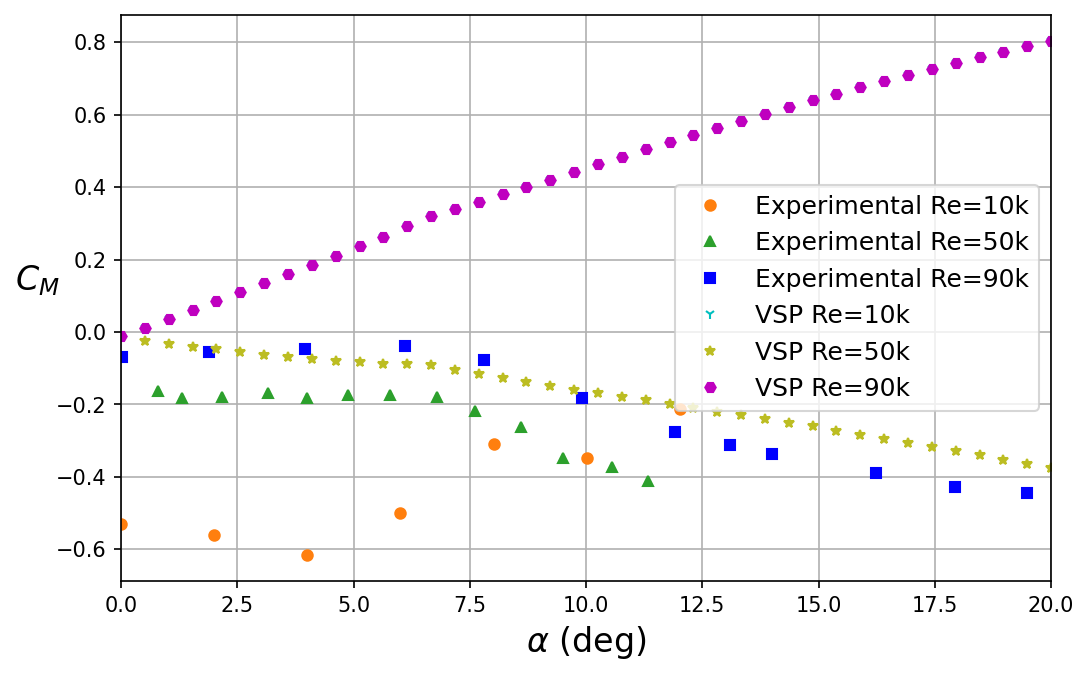

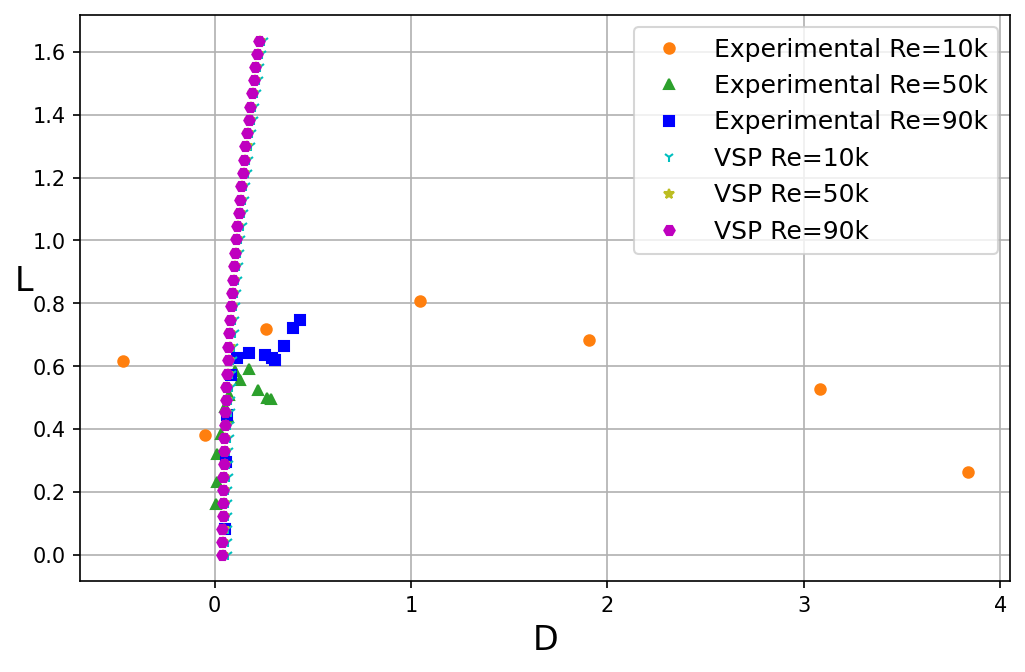

In [75]:
config = [['10k', 7, None], ['50k', 7, 13], ['90k', 9, None]]
marker = ['o', '^', 's', '1', '*', 'H']
color = ['tab:orange', 'tab:green', 'b', 'c', 'tab:olive', 'm']
fig1, ax1 = plt.subplots(figsize=(8,5), dpi=150)
fig2, ax2 = plt.subplots(figsize=(8,5), dpi=150)
fig3, ax3 = plt.subplots(figsize=(8,5), dpi=150)
fig4, ax4 = plt.subplots(figsize=(8,5), dpi=150)
fig5, ax5 = plt.subplots(figsize=(8,5), dpi=150)
for i in range(len(config)):
    df = load_data('Re_'+config[i][0], config[i][1], nrows=config[i][2])
    C_L = df['L']/df['q']/S
    C_D = df['D']/df['q']/S
    C_M = df['MNP']/df['q']/S/L
    ax1.plot(np.degrees(df['alpha']), C_L, marker[i], markersize=5, color=color[i], label='Experimental Re='+config[i][0])
    ax2.plot(np.degrees(df['alpha']), C_D, marker[i], markersize=5, color=color[i], label='Experimental Re='+config[i][0])
    ax3.plot(np.degrees(df['alpha']), C_L/C_D, marker[i], markersize=5, color=color[i], label='Experimental Re='+config[i][0])
    ax4.plot(np.degrees(df['alpha']), C_M, marker[i], markersize=5, color=color[i], label='Experimental Re='+config[i][0])
    ax5.plot(C_D, C_L, marker[i], markersize=5, color=color[i], label='Experimental Re='+config[i][0])
for df in (vspData10k,vspData50k,vspData90k):
    if(df.name == '10k'):
        i = 3
    if(df.name == '50k'):
        i = 4
    if(df.name == '90k'):
        i = 5
    ax1.plot(df['Alpha'], df['CL'], marker[i], markersize=5, color=color[i], label='VSP Re='+df.name)
    ax2.plot(df['Alpha'], df['CDtot'], marker[i], markersize=5, color=color[i], label='VSP Re='+df.name)
    ax3.plot(df['Alpha'], df['L/D'], marker[i], markersize=5, color=color[i], label='VSP Re='+df.name)
    ax4.plot(df['Alpha'], df['CMy'], marker[i], markersize=5, color=color[i], label='VSP Re='+df.name)
    ax5.plot(df['CDtot'], df['CL'], marker[i], markersize=5, color=color[i], label='VSP Re='+df.name)     
ax1.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax2.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax3.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax4.set_xlabel(r'$\alpha$ (deg)', fontsize=16)
ax5.set_xlabel(r'D', fontsize=16)
ax1.set_ylabel(r'$C_L$', rotation=0, fontsize=16)
ax2.set_ylabel(r'$C_D$', rotation=0, fontsize=16)
ax3.set_ylabel(r'$\dfrac{L}{D}$', rotation=0, fontsize=16)
ax4.set_ylabel(r'$C_M$', rotation=0, fontsize=16)
ax5.set_ylabel(r'L',rotation=0, fontsize=16)
ax1.yaxis.set_label_coords(-0.09, 0.5)
ax2.yaxis.set_label_coords(-0.09, 0.5)
ax3.yaxis.set_label_coords(-0.09, 0.5)
ax4.yaxis.set_label_coords(-0.09, 0.5)
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)
ax5.legend(fontsize=12)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax1.set_xlim(0, 20)
ax2.set_xlim(0, 20)
ax3.set_xlim(0, 20)
ax4.set_xlim(0, 20)
fig1.savefig('CL_all.png')
fig2.savefig('CD_all.png')
fig3.savefig('LD_all.png')
fig4.savefig('CM_all.png')
fig5.savefig('LoD_all.png')
